# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [196]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

load_dotenv()

%matplotlib inline

In [197]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API")

In [198]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [199]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q="bitcoin", language="en")
print(f"Articles about bitcoin: {btc_news['totalResults']}")

Articles about bitcoin: 8720


In [200]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q="ethereum", language="en")
print(f"Articles about ethereum: {eth_news['totalResults']}")

Articles about ethereum: 1756


In [201]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu   
        })
        
    except AttributeError:
        pass

btc_df = pd.DataFrame(btc_sentiments)
columns = ["compound", "positive", "negative", "neutral", "text"]
btc_df = btc_df[columns]
btc_df.head()

,compound,positive,negative,neutral,text
0,0.3182,0.091,0.000,0.909,Elon Musks cryptocurrency hype was more than j...
1,0.3818,0.071,0.000,0.929,"Tesla, led by Elon Musk, confirmed that it pur..."
2,-0.1027,0.000,0.038,0.962,"For a brief moment on Sunday, before Tesla sai..."
3,0.2500,0.056,0.000,0.944,Twitter and Square CEO Jack Dorsey and rapper ...
4,0.6597,0.137,0.000,0.863,"Today in an SEC filing, Tesla disclosed that i..."


In [202]:
# Create the ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu   
        })
        
    except AttributeError:
        pass

eth_df = pd.DataFrame(eth_sentiments)
columns = ["compound", "positive", "negative", "neutral", "text"]
eth_df = eth_df[columns]
eth_df.head()

,compound,positive,negative,neutral,text
0,-0.3400,0.063,0.119,0.818,Worried that the GeForce RTX 3060 will be sold...
1,0.0000,0.000,0.000,1.000,Coinbase plans to go public by way of a direct...
2,0.0000,0.000,0.000,1.000,FILE PHOTO: Representation of the Ethereum vir...
3,0.0000,0.000,0.000,1.000,By Reuters Staff\r\nFILE PHOTO: Representation...
4,0.0258,0.030,0.000,0.970,While the first Christie's auction of digital ...


In [203]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.194222,0.072611,0.021889,0.905500
std,0.378672,0.086549,0.036050,0.080977
min,-0.503700,0.000000,0.000000,0.647000
25%,0.000000,0.000000,0.000000,0.868750
50%,0.177900,0.053500,0.000000,0.912500
75%,0.411575,0.098500,0.036500,0.952250
max,0.921700,0.353000,0.114000,1.000000


In [204]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.189495,0.051300,0.005950,0.942750
std,0.274088,0.054785,0.026609,0.062097
min,-0.340000,0.000000,0.000000,0.818000
25%,0.000000,0.000000,0.000000,0.900000
50%,0.012900,0.046500,0.000000,0.949500
75%,0.365100,0.082000,0.000000,1.000000
max,0.709600,0.144000,0.119000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

Outcomes: Bitcoin = 0.072; Ethereum = 0.051

A: Bitcoin had a higher mean positive score


Q: Which coin had the highest compound score?

Outcomes: Bitcoin Compound Mean = 0.194, Bitcoin Compound Max = 0.921; Ethereum Compound Mean = 0.189; Ethereum Compound Max = 0.709

A: Bitcoin had higher overall compound scores


Q. Which coin had the highest positive score?

Outcomes: Bitcoin = 0.353; Ethereum = 0.144

A: Bitcoin had the highest positive score

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [205]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [206]:
# Expand the default stopwords list if necessary
# I did not find it necessary to expand the stopwords list

In [207]:
# Complete the tokenizer function
lemmatizer = WordNetLemmatizer()

def tokenizer(text):
    """Tokenizes text."""
    
   # the prompts did not make as much sense what we did in class, I prefer the following method we utlilized in class
    stop_words = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    regex_clean = regex.sub('', text)
    words = word_tokenize(regex_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in stop_words]
    return tokens

In [208]:
# Create a new tokens column for bitcoin
tokens_btc = []

for text in btc_df['text']:
    tokenized = tokenizer(text)
    tokens_btc.append(tokenized)
    
tokens_df = pd.DataFrame({'tokens': tokens_btc})
btc_df['tokens'] = tokens_df
btc_df.head()

,compound,positive,negative,neutral,text,tokens
0,0.3182,0.091,0.000,0.909,Elon Musks cryptocurrency hype was more than j...,"[elon, musks, cryptocurrency, hype, wa, idle, ..."
1,0.3818,0.071,0.000,0.929,"Tesla, led by Elon Musk, confirmed that it pur...","[tesla, led, elon, musk, confirmed, purchased,..."
2,-0.1027,0.000,0.038,0.962,"For a brief moment on Sunday, before Tesla sai...","[brief, moment, sunday, tesla, said, invested,..."
3,0.2500,0.056,0.000,0.944,Twitter and Square CEO Jack Dorsey and rapper ...,"[twitter, square, ceo, jack, dorsey, rapper, j..."
4,0.6597,0.137,0.000,0.863,"Today in an SEC filing, Tesla disclosed that i...","[today, sec, filing, tesla, disclosed, ha, acq..."


In [209]:
# Create a new tokens column for ethereum
tokens_eth = []

for text in eth_df['text']:
    tokenized = tokenizer(text)
    tokens_eth.append(tokenized)
    
tokens_df = pd.DataFrame({'tokens': tokens_eth})
eth_df['tokens'] = tokens_df
eth_df.head()

,compound,positive,negative,neutral,text,tokens
0,-0.3400,0.063,0.119,0.818,Worried that the GeForce RTX 3060 will be sold...,"[worried, geforce, rtx, sold, cryptocurrency, ..."
1,0.0000,0.000,0.000,1.000,Coinbase plans to go public by way of a direct...,"[coinbase, plan, go, public, way, direct, list..."
2,0.0000,0.000,0.000,1.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
3,0.0000,0.000,0.000,1.000,By Reuters Staff\r\nFILE PHOTO: Representation...,"[reuters, stafffile, photo, representation, et..."
4,0.0258,0.030,0.000,0.970,While the first Christie's auction of digital ...,"[first, christies, auction, digital, artwork, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [210]:
from collections import Counter
from nltk import ngrams

In [211]:
# Generate the Bitcoin N-grams where N=2
corpus_btc = []

for tokens in btc_df['tokens']:
    corpus_btc.extend(tokens)

def bigram_counter(corpus_btc): 
    bigrams = ngrams(corpus_btc, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

bigram_counter(corpus_btc)

,bigram,count
0,"(billion, bitcoin)",3
1,"(elon, musks)",2
2,"(elon, musk)",2
3,"(jack, dorsey)",2
4,"(jay, z)",2
5,"(popular, cryptocurrency)",2
6,"(bitcoin, future)",2
7,"(char, bitcoin)",2
8,"(musks, cryptocurrency)",1
9,"(cryptocurrency, hype)",1


In [212]:
# Generate the Ethereum N-grams where N=2
corpus_eth = []

for tokens in eth_df['tokens']:
    corpus_eth.extend(tokens)

bigram_counter(corpus_eth)

,bigram,count
0,"(char, reuters)",6
1,"(record, high)",6
2,"(feb, reuters)",5
3,"(virtual, currency)",4
4,"(char, new)",4
5,"(new, york)",4
6,"(photo, representation)",3
7,"(representation, ethereum)",3
8,"(ethereum, virtual)",3
9,"(currency, standing)",3


In [213]:
# Use the token_count function to generate the top 10 words from each coin
# approach in class looked much cleaner
def token_counter(corpus): 
    top_10 = dict(Counter(corpus).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [214]:
# Get the top 10 words for Bitcoin
token_counter(corpus_btc)

,word,count
0,char,18
1,bitcoin,12
2,cryptocurrency,8
3,tesla,6
4,company,5
5,elon,4
6,wa,4
7,billion,4
8,said,4
9,ha,4


In [215]:
# Get the top 10 words for Ethereum
token_counter(corpus_eth)

,word,count
0,char,20
1,reuters,16
2,ethereum,12
3,bitcoin,8
4,cryptocurrency,7
5,high,7
6,new,6
7,record,6
8,photo,5
9,currency,5


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [216]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

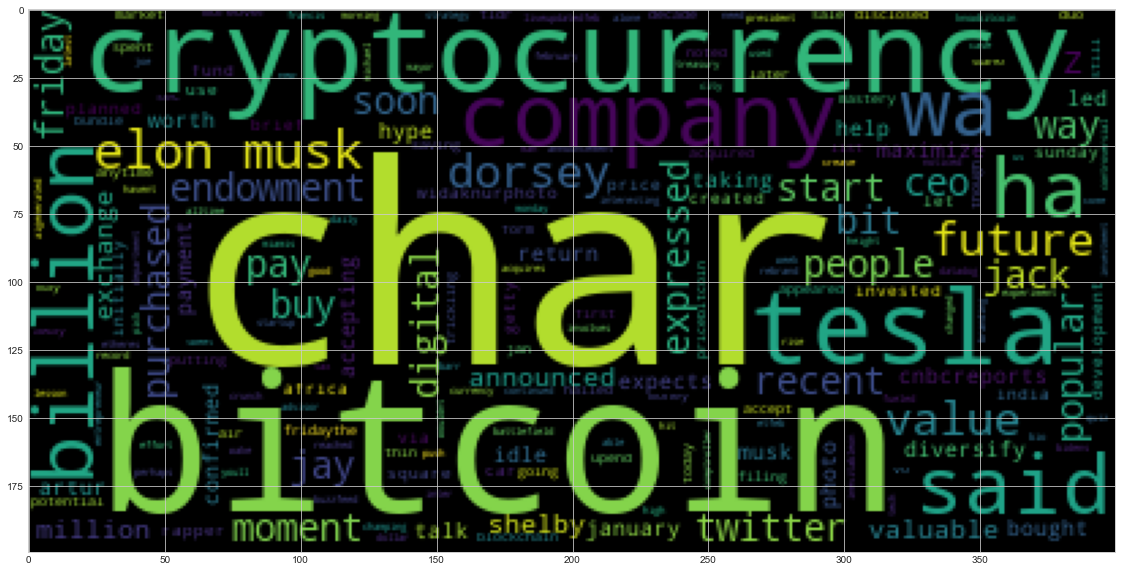

In [217]:
# Generate the Bitcoin word cloud  
def listToString(x):  
    string = " "  
    return (string.join(x))       
 
btc_string = listToString(corpus_btc)

wc = WordCloud().generate(btc_string)
plt.imshow(wc)

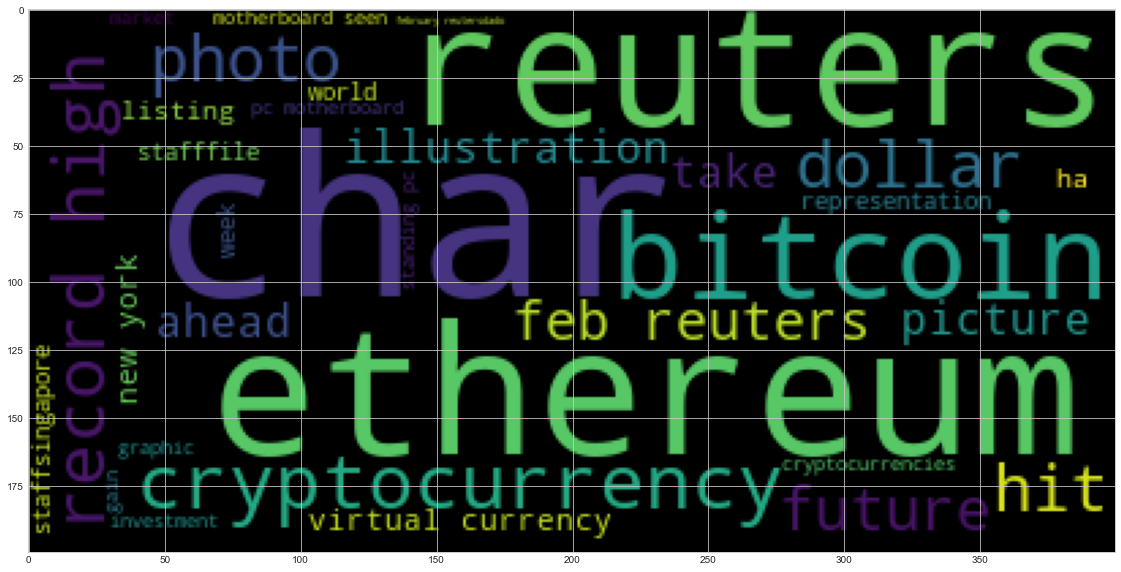

In [218]:
# Generate the Ethereum word cloud
eth_string = listToString(corpus_eth)

wc = WordCloud().generate(eth_string)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [219]:
import spacy
from spacy import displacy

In [220]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [221]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [222]:
# Concatenate all of the bitcoin text together
btc_text = [text for text in btc_df['text']]
btc_text = listToString(btc_text)

In [223]:
# Run the NER processor on all of the text
doc = nlp(btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [224]:
# Render the visualization
displacy.render(doc, style='ent')

In [225]:
# List all Entities
for ent in doc.ents:
    converted_text = "% s" % ent.text
    converted_label = "% s" % ent.label_
    print(converted_text + ' ' + converted_label)

Tesla ORG
$1.5 billion MONEY
Elon Musk PERSON
about $ 1.5 billion MONEY
January DATE
Artur ORG
Widak PRODUCT
NurPhoto ORG
Sunday DATE
Tesla ORG
$1.5 billion MONEY
Jack Dorsey PERSON
Jay Z PERSON
Africa LOC
India GPE
Dorsey ORG
Friday DATE
500 CARDINAL
Today DATE
SEC ORG
Tesla ORG
$1.5 billion MONEY
first ORDINAL
more than a decade later DATE
21.11 MONEY
Jan. 28 DATE
70% PERCENT
Bitcoin PERSON
Feb. 9, 2021 DATE
8:01 a.m. TIME
Feb. 9, 2021 DATE
8:01 a.m. TIME
Bitcoin PERSON
Teslas PERSON
Monday DATE
1.5 MONEY
Bitcoin PERSON
this morning TIME
over $50,000 MONEY
Jack Dorsey PERSON
Jay Z PERSON
Datadog ORG
Startup Battlefield ORG
BuzzFeed ORG
AI ORG
Daily Crunch WORK_OF_ART
February 12, 2021 DATE
Bitcoins PERSON
recent weeks DATE
Friday DATE
Francis Suarez PERSON
Friday DATE
Elon Musk PERSON
Twitter PRODUCT
Musk PERSON
Joe Bidens PERSON
the U.S. Treasury Department ORG
Michael S. Barr PERSON
Alabamas PERSON
Richard Shelby PERSON
next year DATE
Shelby PERSON
86 DATE
seventh ORDINAL
Cryptocur

---

## Ethereum NER

In [226]:
# Concatenate all of the bitcoin text together
eth_text = [text for text in eth_df['text']]
eth_text = listToString(eth_text)

In [227]:
# Run the NER processor on all of the text
doc = nlp(eth_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [228]:
# Render the visualization
displacy.render(doc, style='ent')

In [229]:
# List all Entities
for ent in doc.ents:
    converted_text = "% s" % ent.text
    converted_label = "% s" % ent.label_
    print(converted_text + ' ' + converted_label)

GeForce ORG
3060 GPE
GPU ORG
today DATE
2012 DATE
Ethereum ORG
February 3, 2018 DATE
Reuters ORG
Reuters ORG
Ethereum ORG
February 3, 2018 DATE
first ORDINAL
Christie's ORG
NFT ORG
a few days DATE
Chris Torres PERSON
3060 DATE
GPU ORG
next week DATE
Nvidia PERSON
this morning TIME
Reuters ORG
SINGAPORE GPE
Feb 9 DATE
Reuters ORG
Asia LOC
Tuesday DATE
Tesla Inc ORG
Reuters ORG
FILE PERSON
Bitcoin PERSON
Marseille GPE
France GPE
February 7, 2021 DATE
Eric Gaillard PERSON
SINGAPORE PERSON
Reuters ORG
NEW YORK GPE
Reuters ORG
second ORDINAL
Thursday DATE
NEW YORK GPE
Feb 18 DATE
Reuters ORG
second ORDINAL
Thursday DATE
Ethereum ORG
February 3, 2018 DATE
LONDON GPE
Friday DATE
Thyagaraju Adinarayan PERSON
Anna Irrera PERSON
Musk PERSON
Dogecoin GPE
Dogecoin GPE
nearly 68% PERCENT
$0.054496
 MONEY
NEW YORK GPE
Reuters ORG
$245 million MONEY
last week DATE
80% PERCENT
Reuters ORG
SINGAPORE PERSON
Reuters ORG
Asian NORP
Saturday DATE
two-month DATE
$1 trillion MONEY
a day earlier DATE
NEW YORK